##  Import the module

In [1]:
from numpyworld import World

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Draw colorful lines 1

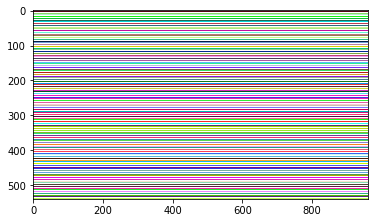

In [2]:
from numpyworld import World

width = 1920 // 2
height = 1080 // 2

world = World(width=width, height=height)
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

for y in range(height):
    if y % 2 == 0:
        color = world.get_random_color()
        for x in range(width):
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful lines 2

[54, 108, 162, 216, 270, 324, 378, 432, 486, 540]


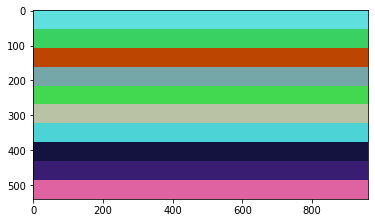

In [3]:
from numpyworld import World

width = 1920 // 2
height = 1080 // 2

world = World(width=width, height=height)
world.enable_jupyter_notebook_mode()

parts_number = 10
part_length = height // parts_number
parts = [(part_index+1)*part_length for part_index in range(parts_number)]
print(parts)

color = world.get_random_color()
for y in range(height):
    if (y in parts):
        color = world.get_random_color()
    for x in range(width):
        world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful box

[0, 90, 180, 270, 360, 450, 540]
[0, 96, 192, 288, 384, 480, 576, 672, 768, 864, 960]


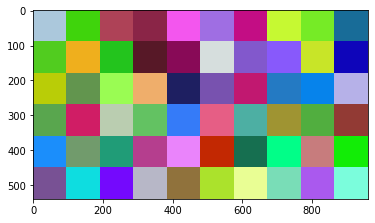

In [4]:
from numpyworld import World

width = 1920 // 2
height = 1080 // 2

world = World(width=width, height=height)
world.enable_jupyter_notebook_mode()

y_parts_number = 6 
y_part_length = height // y_parts_number
y_parts = [(part_index+1)*y_part_length for part_index in range(y_parts_number)]
y_parts.insert(0, 0)

x_parts_number = 10
x_part_length = width // x_parts_number
x_parts = [(part_index+1)*x_part_length for part_index in range(x_parts_number)]
x_parts.insert(0, 0)

print(y_parts)
print(x_parts)

color = world.get_random_color()
for current_y_part in range(y_parts_number):
    for current_x_part in range(x_parts_number):
        color = world.get_random_color()
        for y in range(y_parts[current_y_part], y_parts[current_y_part+1]):
            for x in range(x_parts[current_x_part], x_parts[current_x_part+1]):
                world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a circle

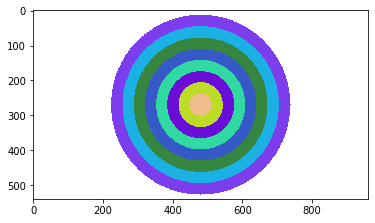

In [5]:
import math
from numpyworld import World

width = 1920 // 2
height = 1080 // 2

world = World(width=width, height=height)
world.enable_jupyter_notebook_mode()

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
for y in range(height):
    for x in range(width):
        distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
        if distance <= radius:
            for i in range(parts_number):
                if (parts[i] <= distance <= parts[i + 1]):
                    color = color_list[i]
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a dynamic circle

In [6]:
import numpy as np
from moviepy.editor import VideoClip

import math
from time import sleep

from numpyworld import World

width = 1920 // 4
height = 1080 // 4

world = World(width=width, height=height)
world.enable_jupyter_notebook_mode()

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
default_frames = 8
frames = 0

def make_frame(t):
    global frames
    global color
    for y in range(height):
        for x in range(width):
            distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
            if distance <= radius:
                for i in range(parts_number):
                    if (parts[i] <= distance <= parts[i + 1]):
                        i = i + frames - 8
                        color = color_list[i]
                world.draw_a_point(x, y, color)
    frames = int(t/0.3) % int(parts_number)
    return world.image

world.show_animation(make_frame, duration=parts_number, fps=5, saving_path=None)

t:   5%|▌         | 2/40 [00:00<00:03, 10.68it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Gate for death

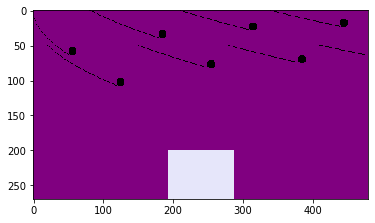

In [7]:
from numpyworld import World
import numpy as np
import math

width = 1920 // 4
height = 1080 // 4

world = World(width=width, height=height, background_color=(128,0,128))
world.enable_jupyter_notebook_mode()

center_x = width // 2
center_y = height // 2
gate_width = width // 5
gate_height = height // 3.8
gate_top_left_x = center_x - gate_width//2
gate_top_left_y = height - gate_height

def parabola(center_x, top_y, size_in_x):
    global width, height
    
    # line
    half_size = size_in_x // 2
    p = 20 
    x_array = np.abs(np.arange(center_x-half_size, center_x+half_size))
    y_array = np.abs(np.sqrt(4*p*x_array).astype(int))
    y_min = np.amin(y_array)
    y_array = y_array - y_min
    y_array = y_array + top_y
    for index, x in np.ndenumerate(x_array):
        y = y_array[index]
        if 0<=x<width and 0<=y<height:
            #world.draw_a_point(x, y, (240,128,128))
            world.draw_a_point(x, y, (0,0,0))
    
    # circle
    half_size = half_size//3
    x_max = np.amax(x_array)
    y_max = np.amax(y_array)
    square = np.zeros((half_size, half_size))
    center_x = x_max + (half_size//2)
    center_y = y_max - (half_size//2)
    for iy in range(half_size):
        for ix in range(half_size):
            x = ix + x_max
            y = y_max - iy
            if 0<=x<width and 0<=y<height:
                distance = math.sqrt(math.pow((center_x - x - (half_size//7)), 2) + math.pow((center_y - y + (half_size//5)), 2))
                if (distance < half_size//2.5):
                    #world.draw_a_point(x, y, (255,0,0))
                    world.draw_a_point(x, y, (0,0,0))

for y in range(height):
    for x in range(width):
        # gate
        if gate_top_left_x < x < gate_top_left_x+gate_width:
            if gate_top_left_y < y < gate_top_left_y+gate_height:
                world.draw_a_point(x, y, (230,230,250))
        # dark cloud
        if x % 130 == 0:
            parabola(x, 0, 100)
            parabola(x+70, 50, 100)

world.show()
world.save()

## Test for Object (without tansparency)

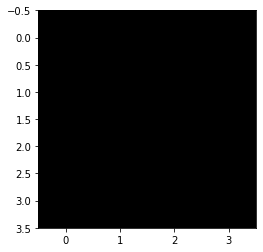

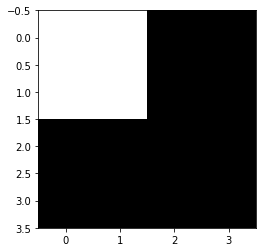

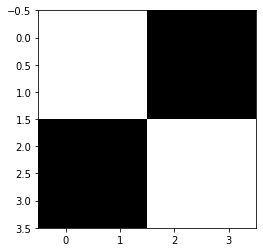

In [8]:
from numpyworld import Object, World
import numpy as np

width = 4
height = 4

world = World(width=width, height=height, background_color=(0,0,0))
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

array = np.ones((2,2,3)) * 255
obj = Object(array)

world.show()
world.draw(obj.image)
world.show()
world.draw(obj.image, (2,2))
world.show()

## Test for Object (with tansparency)

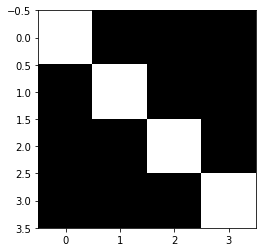

In [9]:
from numpyworld import Object, World
import numpy as np

width = 4
height = 4

world = World(width=width, height=height, background_color=(0,0,0,255))
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

array = np.array([[[255, 255, 255, 255], [255, 255, 255, 0]], 
                  [[255, 255, 255, 0], [255, 255, 255, 255]]])
obj = Object(array)

world.draw(obj.image, (0,0))
world.draw(obj.image, (2,2))
world.show()

## Crossing Balls

In [10]:
from numpyworld import Object, World
import numpy as np
import math
import random

width = 1920 // 4
height = 1080 // 4

world = World(width=width, height=height, background_color=(255,255,255,0))
world.enable_jupyter_notebook_mode()

radius = width // 50 
def get_a_ball():
    array = np.ones((radius*2, radius*2, 1))
    red_color = (255,0,0)
    obj = Object(array, color=red_color)
    for y in range(radius*2):
        for x in range(radius*2):
            distance = math.sqrt(math.pow((radius - x), 2) + math.pow((radius - y), 2))
            if distance <= radius:
                obj.draw_a_point(x, y, red_color)
            else:
                obj.draw_a_point(x, y, (0,0,0,0))
    return obj

fps = 20 
duration = 7
ball = get_a_ball()
ratio = 1
world.backup()
def get_frame_by_time(t):
    global ratio
    
    move_distance = int(radius*1*ratio) #c
    direction_in_degree = 90 #theta
    move_in_y = math.cos(direction_in_degree) * move_distance #a
    move_in_x = math.sqrt(move_distance**2 - move_in_y**2) #b
    
    y = abs(int(move_in_y))
    x = abs(int(move_in_x))
    
    t = t // (1/fps)
    if t % (fps//2.5) == 1:
        ball.change_color(world.get_random_color())
    if t % 2 == 1:
        world.restore()
        ratio = ratio + 1
        adds = ratio * 3
        for i in range(3):
            world.draw(ball.image, (x-ratio*i,y+ratio*i))
            world.draw(ball.image, (x+ratio*i,y-ratio*i))
            
            #x = width - x
            #world.draw(ball.image, (x-ratio*i,y+ratio*i))
            #world.draw(ball.image, (x+ratio*i,y-ratio*i))
            
            x = width - x
            y = height - y
            world.draw(ball.image, (x-ratio*i,y+ratio*i))
            world.draw(ball.image, (x+ratio*i,y-ratio*i))
        world.backup("last")
    else:
        world.restore("last")
        
    return world.image

world.show_animation(get_frame_by_time, duration=duration, fps=fps, saving_path=None)

t:  14%|█▎        | 19/140 [00:00<00:00, 189.76it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Happy Day

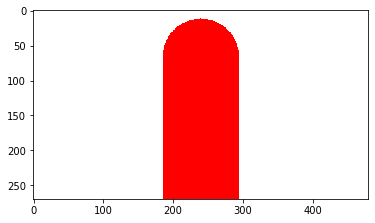

In [2]:
from numpyworld import World
import numpy as np
import math
import random

width = 1920 // 4
height = 1080 // 4

world = World(width=width, height=height, background_color=(0,0,0,0))
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

line_width = int(width / 1.8)
a_line = world.create_an_object(np.ones((line_width,line_width,1)), color=(0,0,0,0))
center_x = line_width // 2
center_y = line_width // 2
radius = line_width // 5
range_ = line_width // 100
for y in range(line_width):
    for x in range(line_width):
        distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
        if radius <= distance <= radius + range_:
            a_line.draw_a_point(x, y, (255, 0, 0, 255))

for y in range(height):
    world.draw(a_line.image[:center_y, :], center_position=(width//2, y))

world.show()